<a href="https://colab.research.google.com/github/lth01/DAP/blob/main/lecture4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Cars93 data
In this lab, we would like to explore data about 93 number of vehicles.

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')
df.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25.0,31.0,None,Front,4,1.8,140.0,6300.0,2890.0,Yes,13.2,5.0,177.0,102.0,68.0,37.0,26.5,NaN,2705.0,non-USA,Acura Integra
1,NaN,Legend,Midsize,29.2,33.9,38.7,18.0,25.0,Driver & Passenger,Front,6,3.2,200.0,5500.0,2335.0,Yes,18.0,5.0,195.0,115.0,71.0,38.0,30.0,15.0,3560.0,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20.0,26.0,Driver only,Front,6,2.8,172.0,5500.0,2280.0,Yes,16.9,5.0,180.0,102.0,67.0,37.0,28.0,14.0,3375.0,non-USA,Audi 90
3,Audi,100,Midsize,NaN,37.7,44.6,19.0,26.0,Driver & Passenger,NaN,6,NaN,172.0,5500.0,2535.0,NaN,21.1,6.0,193.0,106.0,NaN,37.0,31.0,17.0,3405.0,non-USA,Audi 100
4,BMW,535i,Midsize,NaN,30.0,NaN,22.0,30.0,NaN,Rear,4,3.5,208.0,5700.0,2545.0,Yes,21.1,4.0,186.0,109.0,69.0,39.0,27.0,13.0,3640.0,non-USA,BMW 535i


# Matplotlib
Please refer the [official doc](https://matplotlib.org/) or following [article](https://www.machinelearningplus.com/plots/matplotlib-tutorial-complete-guide-python-plot-examples/) for further detailed tricks.

**[TODO]** Draw *pie chart* of `Type` (hint, refer pandas'  [`.value_counts`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html) method and the [article](https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f) about *pie chart*).

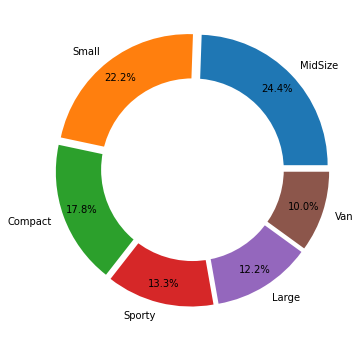

In [4]:
typeCount = df['Type'].value_counts()
fig, ax = plt.subplots(figsize=(6,6))
label=['MidSize','Small','Compact','Sporty','Large','Van']


ax.pie(typeCount,
       explode=(0.05,0.05,0.05,0.05,0.05,0.05),
       labels=label,
       autopct='%1.1f%%',
       pctdistance=0.85
       )

#draw white circle in the middle
centre_circle =plt.Circle((0,0),0.7,fc='w')
ax.add_patch(centre_circle)
ax.set_aspect('equal')


plt.show()

# Seaborn

Please refer the [official doc](https://seaborn.pydata.org/).

**[TODO]** Plot *boxplot* which comparing the `Price` according to `Type`. The plot must satisify following conditions.
 * nested grouping within additional categorical variable, `Origin`
 * using `Greys` color palette


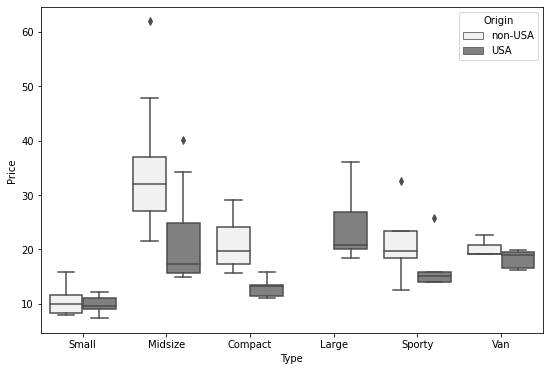

In [5]:
fig, ax = plt.subplots(figsize=(9,6))
sns.boxplot(x="Type",y="Price",hue="Origin",data=df,color='gray')
plt.show()

**[TODO]** Plot *pair plot*. The plot must satisify following conditions.
* Target variables are `Price`, `MPG.city`,	`MPG.highway`, `Rev.per.mile`.
* **[Advanced and Optional]** For the non-diagonal plots, add text with pearson's correlation value. (hint, you should add text manually using iteration)

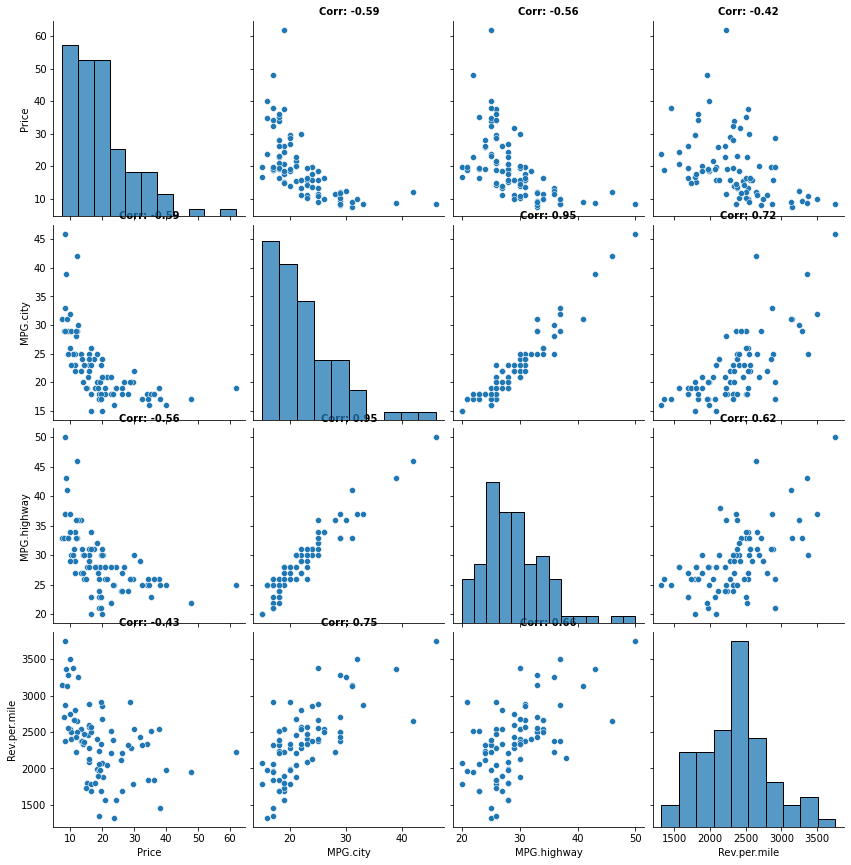

In [10]:
targetVar = ['Price', 'MPG.city', 'MPG.highway', 'Rev.per.mile']             

g = sns.pairplot(df,x_vars=targetVar,y_vars=targetVar,height=3.0)

corrValue = df[targetVar].dropna().to_numpy()
corrValue_Price=df['Price']
corrValue_MPGcity=df['MPG.city']
corrValue_MPGhighway=df['MPG.highway']
corrValue_Revpermile=df['Rev.per.mile']

comparr=[]
comparr2=[]
for i, (ax, cv) in enumerate(zip(g.axes.flat, corrValue.flatten())):  
  if(i%5==0):
    continue
  for j in range(0,len(corrValue.flatten()),len(targetVar)):
    if(int(i/len(targetVar))+j+1>len(corrValue.flatten())):
        break
    serval=corrValue.flatten()[int(i/len(targetVar))+j]
    if(np.isnan(serval)):
      continue
    comparr.append(serval)
  for j in range(0,len(corrValue.flatten()), len(targetVar)):
    if(int(i/len(targetVar))+j+i+2>len(corrValue.flatten())):
        break
    serval2=corrValue.flatten()[(i%4)+j]
    if(np.isnan(serval2)):
      continue
    comparr2.append(serval2) 

  compSer=pd.Series(np.array(comparr))
  compSer2=pd.Series(np.array(comparr2))

  comparr=[]
  comparr2=[]
  
  ax.set_title("Corr: %.2f"%(compSer.corr(compSer2)),fontdict={'fontsize':10,'fontweight':'bold'},y=0.1)
  #ax.set_label("Corr: %f"%(compSer.corr(compSer2,method='kendall')))
  

plt.show()

# Plotly

**[TODO]** Plot *density contour plot* and deploy the dashboard.
* The *density contour plot* should show relationship between `Price` and user choosen variable.

(please refer [official doc](https://plotly.com/python/2d-histogram-contour/) about *density contour plot*)


In [11]:
# install packages
!pip install dash
!pip install jupyter_dash

     |████████████████████████████████| 7.3 MB 13.9 MB/s 
     |████████████████████████████████| 23.9 MB 13 kB/s 
     |████████████████████████████████| 357 kB 33.8 MB/s 
  Created wheel for dash-core-components: filename=dash_core_components-2.0.0-py3-none-any.whl size=3821 sha256=a9d663a8c2e41bdcdd667b19092b499af70a1d04fad3734e5ab6bc3b0488592f
  Stored in directory: /root/.cache/pip/wheels/00/f9/c7/1a6437d794ed753ea9bc9079e761d4fc803a1f1f5d3697b9ec
  Created wheel for dash-html-components: filename=dash_html_components-2.0.0-py3-none-any.whl size=4089 sha256=07fbb15b8928c369fe00e68af7173712de46db6d9aeda37212b847169b08ad5c
  Stored in directory: /root/.cache/pip/wheels/ec/6b/81/05aceabd8b27f724e2c96784016287cc1bfbc349ebfda451de
  Created wheel for dash-table: filename=dash_table-5.0.0-py3-none-any.whl size=3911 sha256=cdfe5de91c0a457daf886be4cc502ea5e308151c7220ac9e3b268a8a367bb381
  Stored in directory: /root/.cache/pip/wheels/85/5d/4e/7c276b57992951dbe770bf5caad6448d0539c510663aef

In [19]:
import dash
from dash import html
import plotly.graph_objects as go
from dash import dcc
import plotly.express as px
from dash.dependencies import Input, Output

from jupyter_dash import JupyterDash

# Load Dash App
app = JupyterDash()

# Define App
app.layout = html.Div(id = 'parent',
                      children = [html.H1(id = 'H1', children = 'Cas93 Dashboard',
                                          style = {'textAlign':'center',\
                                                   'marginTop':40,
                                                   'marginBottom':40}),
                                  dcc.Dropdown(id='dropdown',
                                               options = [{'label':'MPG.city', 'value':'MPG.city'},
                                                          {'label':'MPG.highway','value':'MPG.highway'},
                                                          {'label':'Rev.per.mile','value':'Rev.per.mile'},],
                                              value = 'MPG.city'),
                                  dcc.Graph(id = 'plot')
                                  ])

# Define callback decorator and it's function    
@app.callback(Output(component_id='plot', component_property= 'figure'),
              [Input(component_id='dropdown', component_property= 'value')])
def graph_update(dropdown_value):
    print(dropdown_value)
    fig = px.density_contour(df,x=df['Price'],y=df['{}'.format(dropdown_value)],marginal_x="histogram",marginal_y="histogram")

    return fig  

if __name__ == '__main__': 
    app.run_server()

Dash app running on:


<IPython.core.display.Javascript object>